In [8]:
import pandas as pd
import numpy as np

from pathlib import Path


In [9]:


### Scoring function for participating teams :
def incr_act_top10(input_df: pd.DataFrame,
                   pred_col: str,
                   cm_key='customer',
                   treated_col='ind_recommended',
                   actual_col='activation'):
    '''
    Function that returns the incremental activation score for the AMEX Singapore Hackathon 2024

    input_df : pandas Dataframe which has customer, ind_recommended, activation and pred_col
    pred_col : name of your prediction score variable
    cm_key : customer unique ID (do not change)
    treated_col : indicator variable whether a merchant was recommended
    actual_col : whether a CM had transacted at a given merchant (target variable)

    Returns - incremental activation
    '''
    
	#for correcting variable types
    input_df[[treated_col, actual_col, pred_col]] = input_df[[treated_col, actual_col, pred_col]].apply(pd.to_numeric, errors='coerce')
	
    input_df['rank_per_cm1'] = input_df.groupby(cm_key)[pred_col].rank(method='first', ascending=False)
    
    input_df = input_df.loc[input_df.rank_per_cm1 <= 10,:]
    
    agg_df = input_df.groupby(treated_col,as_index=False).agg({actual_col:'mean'})
    agg_df.columns = [treated_col,'avg_30d_act']
    
    print(agg_df)
    recommended_avg_30d_act = float(agg_df.iloc[agg_df[treated_col]==1,'avg_30d_act'])
    not_recommended_avg_30d_act = float(agg_df.iloc[agg_df[treated_col]==0,'avg_30d_act'])
    
	
    return (recommended_avg_30d_act-not_recommended_avg_30d_act)
	
# example usage
# incr_act_top_10(input_df = my_test_pd_df, pred_col = 'prediction_score')

def extractSubmision(input_df:pd.DataFrame,
                     pred_col: str,
                     cm_key='customer',
                     mct_key='merchant',
                     output_path='submission.csv')->None:
    '''
    function that extracts the submission file for the AMEX Singapore Hackathon 2024

    input_df : pandas Dataframe which has customer, merchant and pred_col
    pred_col : name of your prediction score variable
    cm_key : customer unique ID (do not change)
    mct_key : merchant unique ID (do not change)
    output_path : path to save the submission file

    Returns - None
    '''
    LEN=len(input_df)
    if LEN!=12604600:
        raise f"miss matchlenth {LEN} "
    output_df=pd.DataFrame()
    output_df[[cm_key,mct_key,'predicted_score']]=input_df[[cm_key,mct_key,pred_col]].apply(pd.to_numeric,errors='coerce')
    output_df.to_csv(output_path,index=False)
    return None



In [10]:

if Path('data/Amex_ori/Amex Campus Challenge Train 3.parquet').exists():
    dataset1 = pd.read_parquet('data/Amex_ori/Amex Campus Challenge Train 3.parquet')
else:
    dataset1 = pd.read_csv('data/Amex_ori/Amex Campus Challenge Train 3.csv')
    dataset1.to_parquet('data/Amex_ori/Amex Campus Challenge Train 3.parquet')

# dataset.describe()

In [11]:

if Path('data/Amex_ori/Amex Campus Challenge Round 1.parquet').exists():
    dataset2 = pd.read_parquet('data/Amex_ori/Amex Campus Challenge Round 1.parquet')
else:
    dataset2 = pd.read_csv('data/Amex_ori/Amex Campus Challenge Round 1.csv')
    dataset2.to_parquet('data/Amex_ori/Amex Campus Challenge Round 1.parquet')
# dataset.head()
# dataset.to_parquet('../data/Amex_ori/Amex Campus Challenge Train 3.parquet')

# dataset.describe()

# Lets test the data

In [12]:
dataset1.head()

,ind_recommended,activation,customer_digital_activity_04,customer_spend_01,customer_industry_spend_01,customer_industry_spend_02,customer_industry_spend_03,customer_industry_spend_04,customer_industry_spend_05,customer_spend_02,...,merchant_spend_09,merchant_profile_03,customer_digital_activity_01,merchant_spend_10,customer_profile_03,customer_digital_activity_02,customer_profile_04,distance_05,customer,merchant
0,0,0,NaN,107.215862,26.686594,74.0,3682.75,138.0,111.0,14.0,...,49466.0,65923.0,0.000000,29.180,58.434969,32.500000,86.0,15.856826,168972,152285
1,0,0,NaN,35.552000,50.928261,3.0,1171.35,23.0,17.0,2.0,...,3638.0,7801.0,0.419355,28.465,5.392089,7.000000,125.0,6.998555,212404,39032
2,0,0,NaN,31.623103,48.837872,19.0,2295.38,47.0,42.0,11.0,...,3912.0,12868.0,0.836364,421.500,33.780445,0.000000,180.0,1.753009,225178,7439
3,0,0,NaN,112.277391,NaN,NaN,NaN,NaN,NaN,16.0,...,28919.0,23553.0,0.952381,50.000,37.340085,28.666667,134.0,9.000063,183948,485069
4,1,0,NaN,448.427273,NaN,NaN,NaN,NaN,NaN,5.0,...,1086.0,308.0,0.754386,69.509,77.794164,15.000000,114.0,1.767939,210107,536004


In [13]:
dataset1.describe()

,ind_recommended,activation,customer_digital_activity_04,customer_spend_01,customer_industry_spend_01,customer_industry_spend_02,customer_industry_spend_03,customer_industry_spend_04,customer_industry_spend_05,customer_spend_02,...,merchant_spend_09,merchant_profile_03,customer_digital_activity_01,merchant_spend_10,customer_profile_03,customer_digital_activity_02,customer_profile_04,distance_05,customer,merchant
count,1.222998e+07,1.222998e+07,1.472619e+06,1.018221e+07,6.375794e+06,6.375794e+06,6.375794e+06,6.375794e+06,6.375794e+06,1.018221e+07,...,1.070932e+07,1.070932e+07,1.164126e+07,1.182807e+07,1.214922e+07,1.219710e+07,1.222587e+07,1.222998e+07,1.222998e+07,1.222998e+07
mean,1.264981e-01,5.724949e-03,9.745803e+00,1.342267e+02,1.163290e+02,1.248615e+01,2.160901e+03,3.091256e+01,2.355295e+01,7.641269e+00,...,2.253220e+04,2.165077e+04,5.305736e-01,2.148085e+02,4.773558e+01,6.404841e+00,1.785463e+02,6.190254e+00,2.281051e+05,2.952985e+05
std,3.324099e-01,7.544650e-02,4.156839e+01,6.454738e+02,5.811352e+02,2.123372e+01,2.484325e+04,7.114894e+01,3.983072e+01,6.627998e+00,...,2.629174e+04,2.539957e+04,3.517782e-01,1.115604e+03,3.574659e+01,1.480270e+01,1.392127e+02,8.368794e+00,1.342230e+05,1.714414e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,1.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,0.000000e+00,...,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.060130e-03,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.000000e+00,3.844389e+01,2.416424e+01,2.000000e+00,1.222700e+02,2.000000e+00,2.000000e+00,2.000000e+00,...,3.858000e+03,3.742000e+03,2.000000e-01,2.318750e+01,1.254595e+01,8.333333e-01,6.400000e+01,1.867655e+00,1.106810e+05,1.462930e+05
50%,0.000000e+00,0.000000e+00,2.000000e+00,6.437250e+01,4.453050e+01,4.000000e+00,4.943600e+02,8.000000e+00,7.000000e+00,6.000000e+00,...,1.164100e+04,1.122000e+04,5.396825e-01,4.425000e+01,4.474859e+01,2.166667e+00,1.520000e+02,3.861503e+00,2.265750e+05,2.951570e+05
75%,0.000000e+00,0.000000e+00,6.000000e+00,1.138127e+02,8.793333e+01,1.300000e+01,1.759970e+03,3.000000e+01,2.500000e+01,1.100000e+01,...,2.942700e+04,2.828500e+04,8.800000e-01,1.200000e+02,8.318172e+01,5.166667e+00,2.550000e+02,8.094931e+00,3.445570e+05,4.436670e+05
max,1.000000e+00,1.000000e+00,8.560000e+02,2.489723e+05,1.514893e+05,1.521000e+03,1.889311e+07,2.443500e+04,3.600000e+02,1.520000e+02,...,1.033420e+05,9.863800e+04,1.000000e+00,6.578070e+05,1.000000e+02,2.756500e+03,7.630000e+02,2.540838e+03,4.625830e+05,5.919720e+05


In [14]:
print(f"number of customer in dataset1 : {len(dataset1['customer'].unique())}")
print(f"number of merchant in dataset1 : {len(dataset1['merchant'].unique())}")
print(f"number of transaction in dataset1 : {len(dataset1)}")
print(f"number of customer in dataset2 : {len(dataset2['customer'].unique())}")
print(f"number of merchant in dataset2 : {len(dataset2['merchant'].unique())}")
print(f"number of transaction in dataset2 : {len(dataset2)}")


number of customer in dataset1 : 462584
number of merchant in dataset1 : 591973
number of transaction in dataset1 : 12229978
number of customer in dataset2 : 136831
number of merchant in dataset2 : 1471972
number of transaction in dataset2 : 12604600


## whats the diff of validate and train

In [15]:
print(f'exceeding columns are {set(dataset1.columns)-set(dataset2.columns)}')
print(f'missing columns are {set(dataset2.columns)-set(dataset1.columns)}')
print(f'samples numbers are train: {len(dataset1)} test: {len(dataset2)}')

exceeding columns are {'ind_recommended', 'activation'}
missing columns are set()
samples numbers are train: 12229978 test: 12604600


## given Ativate and Recommendation, There is an optimized ranking -> ADBC

1. model active, model Recom, cal active_pred , Recom_pred->ranking

2. desgin loss fuc, model.

## How we are scored

In [16]:
def test_incr_act_top10(input_df: pd.DataFrame,
                #    pred_col: str,
                   cm_key='customer',
                   treated_col='ind_recommended',
                   actual_col='activation'):
    '''
    Function that returns the incremental activation score for the AMEX Singapore Hackathon 2024

    input_df : pandas Dataframe which has customer, ind_recommended, activation and pred_col
    pred_col : name of your prediction score variable
    cm_key : customer unique ID (do not change)
    treated_col : indicator variable whether a merchant was recommended
    actual_col : whether a CM had transacted at a given merchant (target variable)

    Returns - incremental activation
    '''
    
	#for correcting variable types
    # input_df[[treated_col, actual_col, pred_col]] = input_df[[treated_col, actual_col, pred_col]].apply(pd.to_numeric, errors='coerce')
	
    # input_df['rank_per_cm1'] = input_df.groupby(cm_key)[pred_col].rank(method='first', ascending=False)
    
    # input_df = input_df.loc[input_df.rank_per_cm1 <= 10,:]
    
    agg_df = input_df.groupby(treated_col,as_index=False).agg({actual_col:['mean','sum','count']})
    agg_df.columns = [treated_col,'avg_30d_act','count_act','recommend_cnt']
    
    print(agg_df)
    recommended_avg_30d_act = float(agg_df.loc[agg_df[treated_col]==1,'avg_30d_act'])
    not_recommended_avg_30d_act = float(agg_df.loc[agg_df[treated_col]==0,'avg_30d_act'])
    
	
    return (recommended_avg_30d_act,not_recommended_avg_30d_act)

	

test_df=pd.DataFrame(
    {
        # 'customer':[1,1,1,1,1,2,2,2,2,2],
        # 'merchant':[1,2,3,4,5,1,2,3,4,5],
        'ind_recommended':[1,1,1,1,0,0,0,0,0,0],
        'activation':[1,1,1,1,0,0,0,0,0,0],
        # 'pre_score':[100,90,80,70,60,100,90,80,70,60]
    }
)
# print(test_df)
rer,nrer=test_incr_act_top10(test_df,'pre_score')
print(f"score would be {rer-nrer}")

test_df=pd.DataFrame(
    {
        'ind_recommended':[0,0,0,0,1,1,1,1,0,0],
        'activation':[1,1,1,1,0,0,0,0,0,0],
        # 'pre_score':[100,90,80,70,60,100,90,80,70,60]
    }
)
# print(test_df)
rer,nrer=test_incr_act_top10(test_df,'pre_score')
print(f"score would be {rer-nrer}")

test_df=pd.DataFrame(
    {
        'ind_recommended':[1,1,1,1,1,1,1,1,1,0],
        'activation':[1,1,1,1,0,0,0,0,0,0],
        # 'pre_score':[100,90,80,70,60,100,90,80,70,60]
    }
)
# print(test_df)
rer,nrer=test_incr_act_top10(test_df,'pre_score')
print(f"score would be {rer-nrer}")



   ind_recommended  avg_30d_act  count_act  recommend_cnt
0                0          0.0          0              6
1                1          1.0          4              4
score would be 1.0
   ind_recommended  avg_30d_act  count_act  recommend_cnt
0                0     0.666667          4              6
1                1     0.000000          0              4
score would be -0.6666666666666666
   ind_recommended  avg_30d_act  count_act  recommend_cnt
0                0     0.000000          0              1
1                1     0.444444          4              9
score would be 0.4444444444444444


/var/folders/jp/27s6_5h14bvgzpm2nrn8rdyw0000gn/T/ipykernel_13887/1549628441.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  recommended_avg_30d_act = float(agg_df.loc[agg_df[treated_col]==1,'avg_30d_act'])
/var/folders/jp/27s6_5h14bvgzpm2nrn8rdyw0000gn/T/ipykernel_13887/1549628441.py:30: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  not_recommended_avg_30d_act = float(agg_df.loc[agg_df[treated_col]==0,'avg_30d_act'])
/var/folders/jp/27s6_5h14bvgzpm2nrn8rdyw0000gn/T/ipykernel_13887/1549628441.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  recommended_avg_30d_act = float(agg_df.loc[agg_df[treated_col]==1,'avg_30d_act'])
/var/folders/jp/27s6_5h14bvgzpm2nrn8rdyw0000gn/T/ipykernel_13887/1

In [17]:
# # create a new column in dataset1 by cascate customer and merchant
# Convert columns to strings
# dataset2['customer'] = dataset1['customer'].astype(str)
# dataset2['merchant'] = dataset1['merchant'].astype(str)

# # # Concatenate and join with '_'
# dataset1['customer_merchant'] = dataset1['customer'] + '_' + dataset1['merchant']
# # find the non unique customer_merchant row in dataset1
dataset2[dataset2[['customer','merchant']].duplicated()]



,distance_05,customer_digital_activity_04,customer_spend_01,customer_industry_spend_01,customer_industry_spend_02,customer_industry_spend_03,customer_industry_spend_04,customer_industry_spend_05,customer_spend_02,customer_spend_03,...,merchant_profile_02,merchant_spend_09,merchant_profile_03,customer_digital_activity_01,merchant_spend_10,customer_profile_03,customer_digital_activity_02,customer_profile_04,customer,merchant


the round 1 is *unique* on cm x merchant
the object is to calculate an score. such that the top 10 by this score is best recommended
what we would like to sort out is rec-act, nrec-nact, rec-nact, nrec-rec

In [18]:
dataset1.describe()

,ind_recommended,activation,customer_digital_activity_04,customer_spend_01,customer_industry_spend_01,customer_industry_spend_02,customer_industry_spend_03,customer_industry_spend_04,customer_industry_spend_05,customer_spend_02,...,merchant_spend_09,merchant_profile_03,customer_digital_activity_01,merchant_spend_10,customer_profile_03,customer_digital_activity_02,customer_profile_04,distance_05,customer,merchant
count,1.222998e+07,1.222998e+07,1.472619e+06,1.018221e+07,6.375794e+06,6.375794e+06,6.375794e+06,6.375794e+06,6.375794e+06,1.018221e+07,...,1.070932e+07,1.070932e+07,1.164126e+07,1.182807e+07,1.214922e+07,1.219710e+07,1.222587e+07,1.222998e+07,1.222998e+07,1.222998e+07
mean,1.264981e-01,5.724949e-03,9.745803e+00,1.342267e+02,1.163290e+02,1.248615e+01,2.160901e+03,3.091256e+01,2.355295e+01,7.641269e+00,...,2.253220e+04,2.165077e+04,5.305736e-01,2.148085e+02,4.773558e+01,6.404841e+00,1.785463e+02,6.190254e+00,2.281051e+05,2.952985e+05
std,3.324099e-01,7.544650e-02,4.156839e+01,6.454738e+02,5.811352e+02,2.123372e+01,2.484325e+04,7.114894e+01,3.983072e+01,6.627998e+00,...,2.629174e+04,2.539957e+04,3.517782e-01,1.115604e+03,3.574659e+01,1.480270e+01,1.392127e+02,8.368794e+00,1.342230e+05,1.714414e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,1.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,0.000000e+00,...,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.060130e-03,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.000000e+00,3.844389e+01,2.416424e+01,2.000000e+00,1.222700e+02,2.000000e+00,2.000000e+00,2.000000e+00,...,3.858000e+03,3.742000e+03,2.000000e-01,2.318750e+01,1.254595e+01,8.333333e-01,6.400000e+01,1.867655e+00,1.106810e+05,1.462930e+05
50%,0.000000e+00,0.000000e+00,2.000000e+00,6.437250e+01,4.453050e+01,4.000000e+00,4.943600e+02,8.000000e+00,7.000000e+00,6.000000e+00,...,1.164100e+04,1.122000e+04,5.396825e-01,4.425000e+01,4.474859e+01,2.166667e+00,1.520000e+02,3.861503e+00,2.265750e+05,2.951570e+05
75%,0.000000e+00,0.000000e+00,6.000000e+00,1.138127e+02,8.793333e+01,1.300000e+01,1.759970e+03,3.000000e+01,2.500000e+01,1.100000e+01,...,2.942700e+04,2.828500e+04,8.800000e-01,1.200000e+02,8.318172e+01,5.166667e+00,2.550000e+02,8.094931e+00,3.445570e+05,4.436670e+05
max,1.000000e+00,1.000000e+00,8.560000e+02,2.489723e+05,1.514893e+05,1.521000e+03,1.889311e+07,2.443500e+04,3.600000e+02,1.520000e+02,...,1.033420e+05,9.863800e+04,1.000000e+00,6.578070e+05,1.000000e+02,2.756500e+03,7.630000e+02,2.540838e+03,4.625830e+05,5.919720e+05


# notice the ind recommed ~ 12.65% while activate 0.57%

 copy train data into validate data, without any train. use random date fill up

In [19]:
# add a random column to the dataset1 named pre_score
# import random
# dataset1['pre_score'] = [random.randint(0, 100) for _ in range(len(dataset1))]

def calc(rec:int,act:int):
    crit=rec*2+act
    match crit:
        case 3: # TT
            return 3
        case 0: # NN
            return 2
        case 2: # TN
            return 1
        case 1: # NT
            return 0
    return None
        
# add colum pre_score by func calc eat 'ind_recommended' and 'activaton'
        
dataset1['pre_score']=dataset1.apply(lambda x:calc(x['ind_recommended'],x['activation']),axis=1)
# dataset1['cmxmct']=dataset1.apply(lambda x: f"{str(x['customer'])}_{str[x['merchant']]}")
df=dataset1[['customer','merchant','pre_score']]
# dataset2['cmxmct']=dataset2.apply(lambda x: f"{str(x['customer'])}_{str[x['merchant']]}")
dataset2=pd.merge(dataset2,df,on=['customer','merchant'],how='left')



In [20]:


random_vals = pd.Series(np.random.rand(len(dataset2)))
dataset2['pre_score']=dataset2['pre_score'].fillna(random_vals)
# print(f"score would be {incr_act_top10(dataset2,'pre_score')}")  # typical score would be 0.131 on ds1
len(dataset2)

extractSubmision(dataset2,'pre_score') 
# len(dataset1)

# Preprocess Train Data

In [21]:
'''
Author: Zhen Liu lzhen.dev@outlook.com
CreateDate: Do not edit
LastEditors: Zhen Liu lzhen.dev@outlook.com
LastEditTime: 2024-03-06
Description: 

Copyright (c) 2024 by HernandoR lzhen.dev@outlook.com, All Rights Reserved. 
'''
# del(dataset2)
train=dataset1.copy()
# train.head()
cols = ['pre_score', 'customer', 'merchant', 'merchant_profile_01']
other_cols = sorted([c for c in train.columns if c not in cols])

train = train.reindex(columns=cols + other_cols)
# train.drop(['ind_recommended','activation'])

randam_sample=dataset2.sample(n=100)
randam_sample = randam_sample.sort_index(axis=1)
# randam_sample.to_excel('randam_sample.xlsx')

In [22]:
# train.insert(0, 'pre_score', train.pop('pre_score')) 
# train.describe()

In [23]:
# train.to_csv('../data/train.csv',index=False)
# train.to_parquet('../data/train.parquet',index=False)

In [24]:
train.info()
#直接判断是否存在空值
# train.isnull()
# train.isnull().sum(axis=1).sort_values(ascending=False)

#计算每一列的缺失率
missing_rate=train.apply(lambda x:sum(x.isnull())/len(x))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12229978 entries, 0 to 12229977
Data columns (total 72 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   pre_score                     int64  
 1   customer                      int64  
 2   merchant                      int64  
 3   merchant_profile_01           float64
 4   activation                    int64  
 5   customer_digital_activity_01  float64
 6   customer_digital_activity_02  float64
 7   customer_digital_activity_03  float64
 8   customer_digital_activity_04  float64
 9   customer_digital_activity_05  float64
 10  customer_digital_activity_06  float64
 11  customer_digital_activity_07  float64
 12  customer_digital_activity_08  float64
 13  customer_digital_activity_09  float64
 14  customer_digital_activity_10  float64
 15  customer_digital_activity_11  float64
 16  customer_digital_activity_12  float64
 17  customer_digital_activity_13  float64
 18  customer_digital_act

customer_merchant_01            0.999116
customer_merchant_02            0.999116
customer_digital_activity_07    0.993788
customer_digital_activity_18    0.993788
customer_digital_activity_09    0.993788
                                  ...   
distance_05                     0.000000
customer                        0.000000
activation                      0.000000
merchant                        0.000000
pre_score                       0.000000
Length: 72, dtype: float64


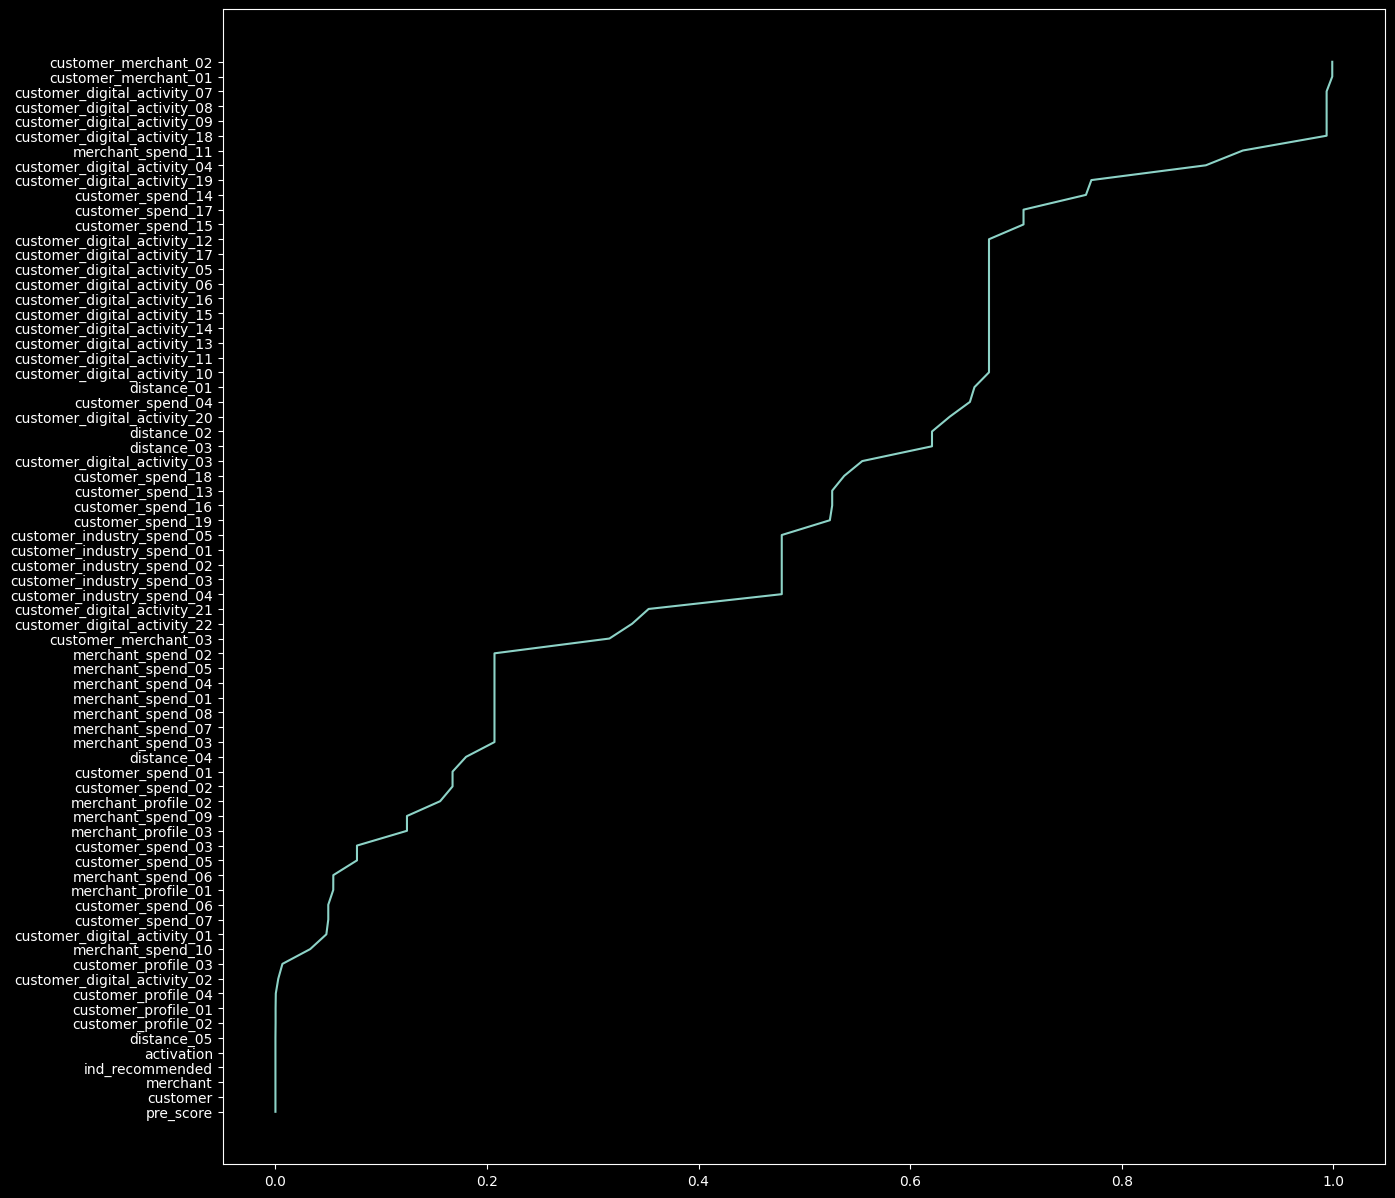

count    72.000000
mean      0.410469
std       0.326821
min       0.000000
25%       0.077081
50%       0.478675
75%       0.674591
max       0.999116
dtype: float64

In [25]:
from matplotlib import pyplot as plt
print(missing_rate.sort_values(ascending=False))
# plt.plot(missing_rate.sort_values(ascending=False))
# reverse x,y of the plot, high resolution
fig=plt.figure(figsize=(15,15))
plt.plot(missing_rate.sort_values().values,missing_rate.sort_values().index)
plt.show()

missing_rate.describe()



In [26]:
# merchant profile 1 is the industry code, drop anything missing rate above it
dropping_cols=missing_rate[missing_rate>missing_rate['merchant_profile_01']].index
# print(dropping_cols)
train=train.drop(columns=dropping_cols)
# set(dropping_cols)-set(train.columns)

merchant_profile_01             0.054656
customer_spend_06               0.049951
customer_spend_07               0.049951
customer_digital_activity_01    0.048137
merchant_spend_10               0.032863
customer_profile_03             0.006603
customer_digital_activity_02    0.002688
customer_profile_04             0.000336
customer_profile_01             0.000139
customer_profile_02             0.000139
pre_score                       0.000000
customer                        0.000000
merchant                        0.000000
activation                      0.000000
distance_05                     0.000000
ind_recommended                 0.000000
dtype: float64


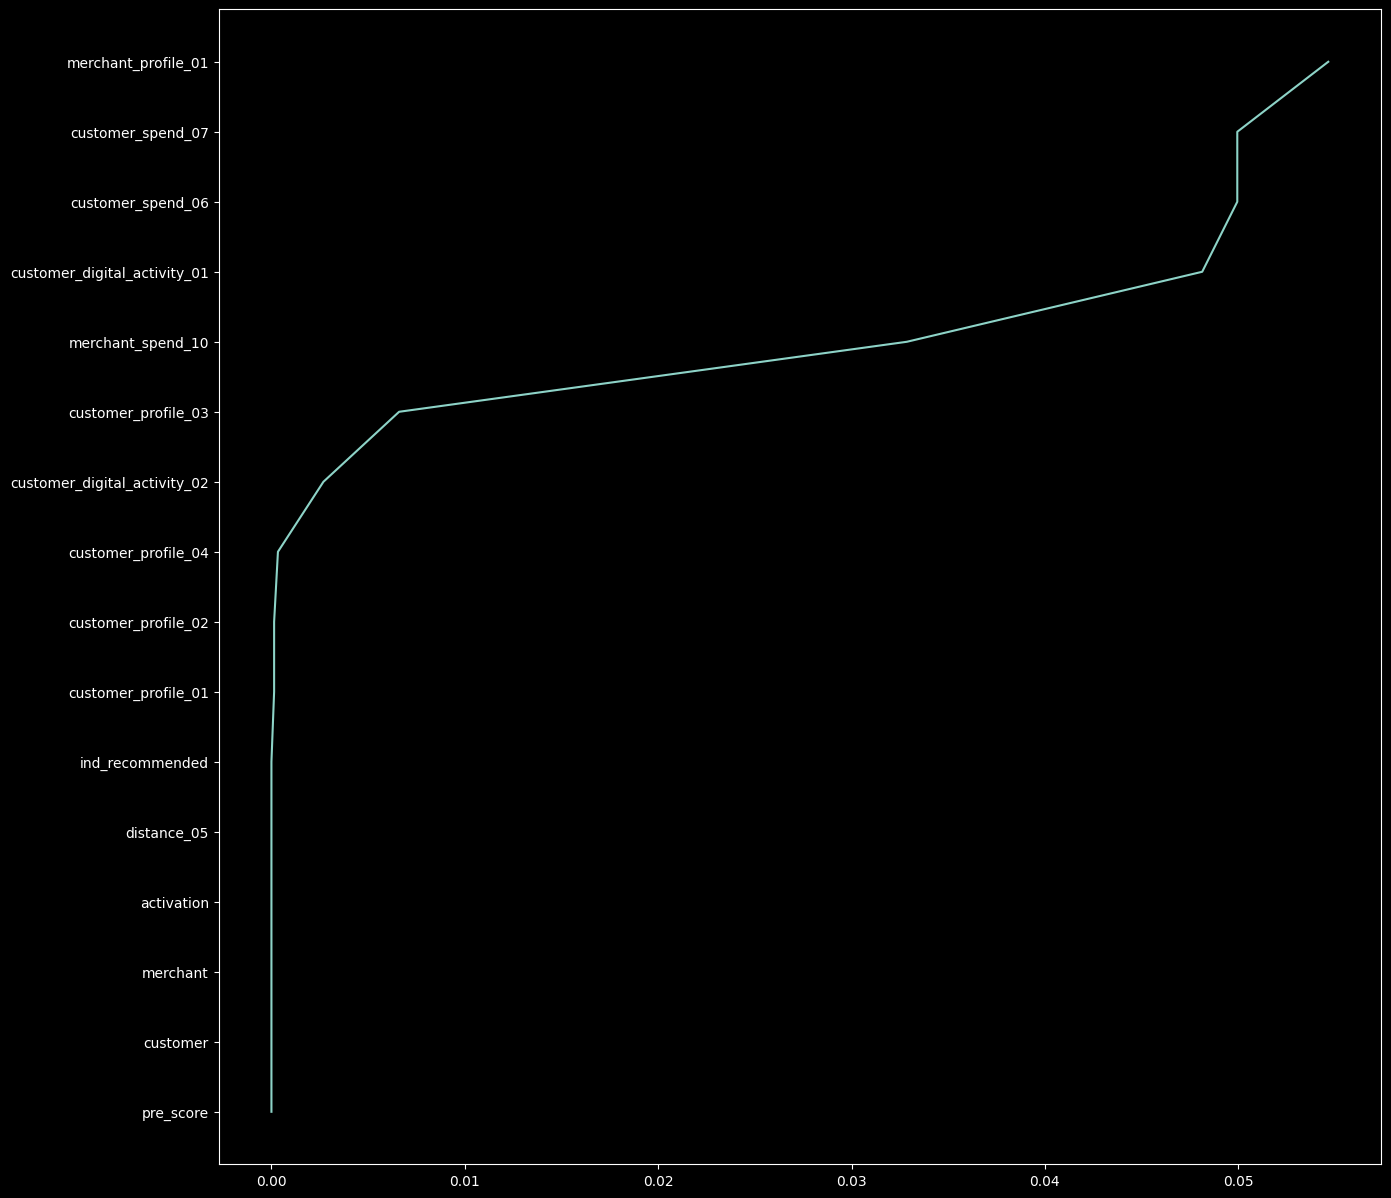

count    16.000000
mean      0.015341
std       0.022598
min       0.000000
25%       0.000000
50%       0.000237
75%       0.036681
max       0.054656
dtype: float64

In [27]:
missing_rate=train.apply(lambda x:sum(x.isnull())/len(x))
print(missing_rate.sort_values(ascending=False))
# plt.plot(missing_rate.sort_values(ascending=False))
# reverse x,y of the plot, high resolution
fig=plt.figure(figsize=(15,15))
plt.plot(missing_rate.sort_values().values,missing_rate.sort_values().index)
plt.show()

missing_rate.describe()


In [35]:
from sklearn.impute import SimpleImputer
#使用众数填充缺失值
# simpleImputer = SimpleImputer(strategy = 'most_frequent')
# idf=pd.DataFrame(simpleImputer.fit_transform(train))
# idf.columns=train.columns
# idf.index=train.index
len(idf)

12229978

In [36]:
# drop NAN
idf=train.dropna()
len(idf)

10075744

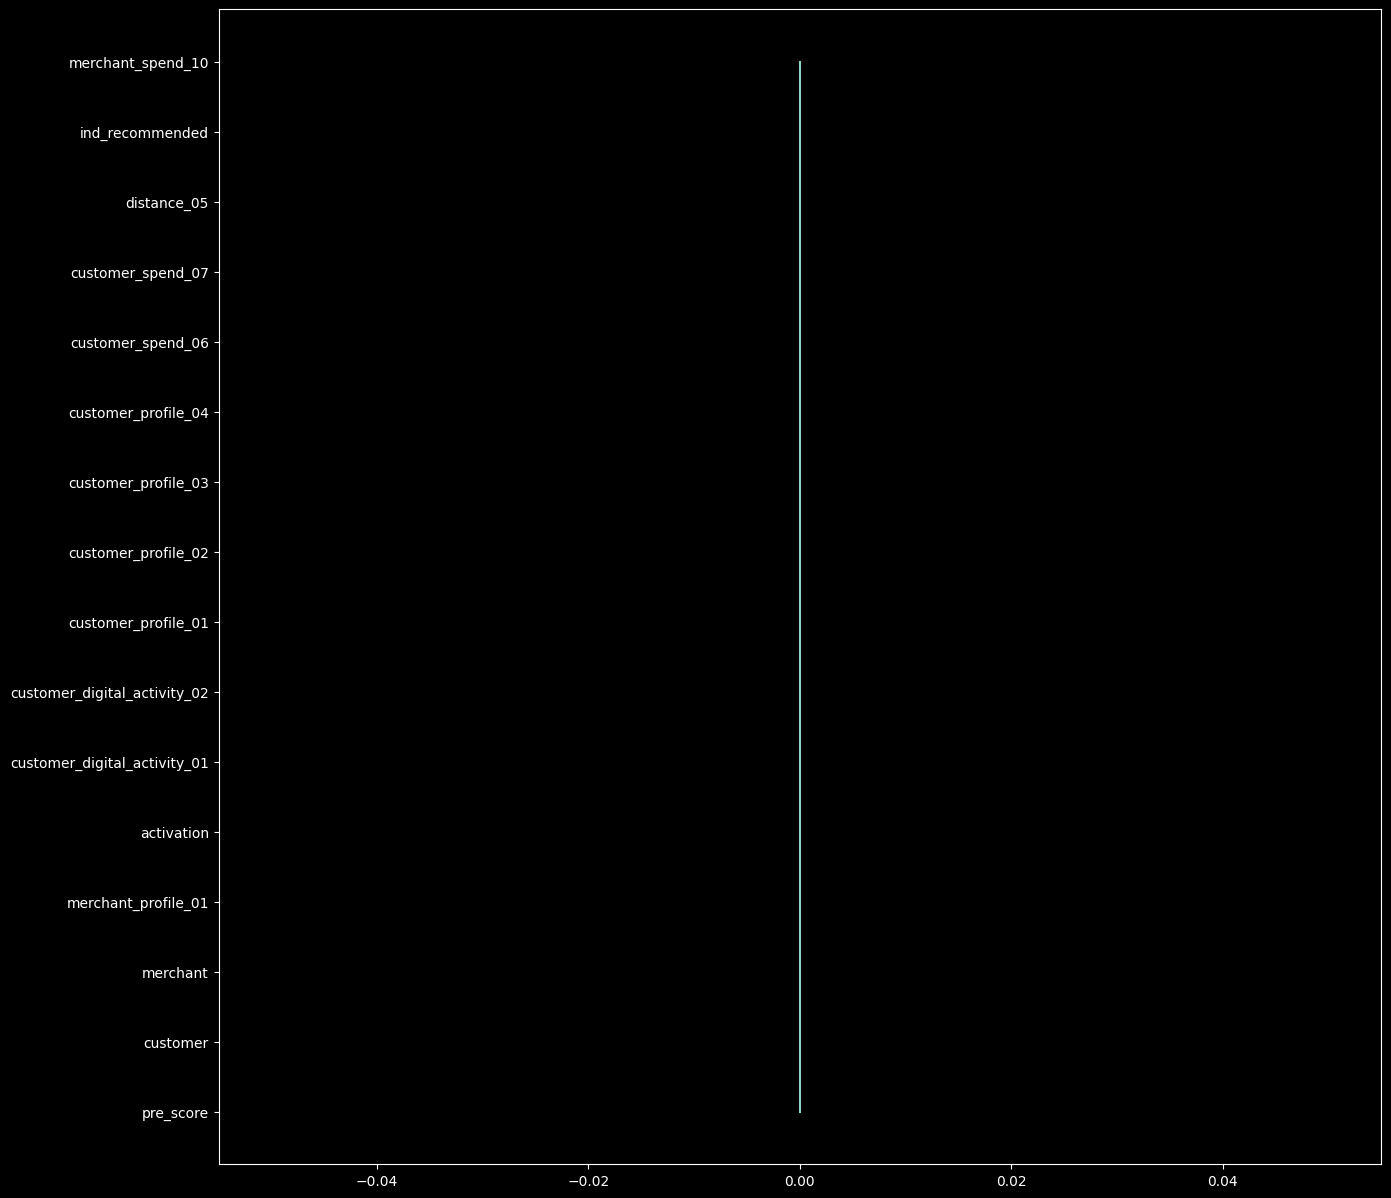

count    16.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64

In [37]:

missing_rate2=idf.apply(lambda x:sum(x.isnull())/len(x))
# print(missing_rate2.sort_values(ascending=False))
# plt.plot(missing_rate2.sort_values(ascending=False))
# reverse x,y of the plot, high resolution
fig=plt.figure(figsize=(15,15))
plt.plot(missing_rate2.sort_values().values,missing_rate2.sort_values().index)
plt.show()

missing_rate2.describe()

    
                              

In [30]:
idf.describe()

,pre_score,customer,merchant,merchant_profile_01,activation,customer_digital_activity_01,customer_digital_activity_02,customer_profile_01,customer_profile_02,customer_profile_03,customer_profile_04,customer_spend_06,customer_spend_07,distance_05,ind_recommended,merchant_spend_10
count,1.222998e+07,1.222998e+07,1.222998e+07,1.222998e+07,1.222998e+07,1.222998e+07,1.222998e+07,1.222998e+07,1.222998e+07,1.222998e+07,1.222998e+07,1.222998e+07,1.222998e+07,1.222998e+07,1.222998e+07,1.222998e+07
mean,1.865271e+00,2.281051e+05,2.952985e+05,2.526689e+02,5.724949e-03,5.531704e-01,6.387622e+00,2.667372e+03,2.415460e+03,4.808068e+01,1.785007e+02,2.226624e+02,1.071998e+02,6.190254e+00,1.264981e-01,2.093925e+02
std,3.578083e-01,1.342230e+05,1.714414e+05,1.389564e+02,7.544650e-02,3.576142e-01,1.478651e+01,1.774403e+04,1.649741e+04,3.587895e+01,1.392114e+02,3.518856e+02,9.799188e+01,8.368794e+00,3.324099e-01,1.097513e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,1.010000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-9.990000e+02,-3.303122e+04,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.060130e-03,0.000000e+00,1.000000e+00
25%,2.000000e+00,1.106810e+05,1.462930e+05,1.010000e+02,0.000000e+00,2.162162e-01,8.333333e-01,9.500000e+01,8.675000e+01,1.269654e+01,6.400000e+01,2.700000e+01,2.100000e+01,1.867655e+00,0.000000e+00,2.381250e+01
50%,2.000000e+00,2.265750e+05,2.951570e+05,3.070000e+02,0.000000e+00,5.769231e-01,2.166667e+00,6.365300e+02,5.066200e+02,4.526645e+01,1.520000e+02,1.110000e+02,7.700000e+01,3.861503e+00,0.000000e+00,4.654375e+01
75%,2.000000e+00,3.445570e+05,4.436670e+05,4.060000e+02,0.000000e+00,9.230769e-01,5.166667e+00,2.222220e+03,1.923240e+03,8.385290e+01,2.550000e+02,3.180000e+02,1.790000e+02,8.094931e+00,0.000000e+00,1.144471e+02
max,3.000000e+00,4.625830e+05,5.919720e+05,5.070000e+02,1.000000e+00,1.000000e+00,2.756500e+03,4.186172e+06,3.401788e+06,1.000000e+02,7.630000e+02,1.215830e+05,3.600000e+02,2.540838e+03,1.000000e+00,6.578070e+05


In [31]:
train.describe()
# train.sample(20)

,pre_score,customer,merchant,merchant_profile_01,activation,customer_digital_activity_01,customer_digital_activity_02,customer_profile_01,customer_profile_02,customer_profile_03,customer_profile_04,customer_spend_06,customer_spend_07,distance_05,ind_recommended,merchant_spend_10
count,1.222998e+07,1.222998e+07,1.222998e+07,1.156154e+07,1.222998e+07,1.164126e+07,1.219710e+07,1.222828e+07,1.222828e+07,1.214922e+07,1.222587e+07,1.161908e+07,1.161908e+07,1.222998e+07,1.222998e+07,1.182807e+07
mean,1.865271e+00,2.281051e+05,2.952985e+05,2.614377e+02,5.724949e-03,5.305736e-01,6.404841e+00,2.667741e+03,2.415794e+03,4.773558e+01,1.785463e+02,2.343168e+02,1.127835e+02,6.190254e+00,1.264981e-01,2.148085e+02
std,3.578083e-01,1.342230e+05,1.714414e+05,1.379072e+02,7.544650e-02,3.517782e-01,1.480270e+01,1.774524e+04,1.649853e+04,3.574659e+01,1.392127e+02,3.572319e+02,9.738127e+01,8.368794e+00,3.324099e-01,1.115604e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,1.010000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-9.990000e+02,-3.303122e+04,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.060130e-03,0.000000e+00,1.000000e+00
25%,2.000000e+00,1.106810e+05,1.462930e+05,1.010000e+02,0.000000e+00,2.000000e-01,8.333333e-01,9.500000e+01,8.691000e+01,1.254595e+01,6.400000e+01,3.500000e+01,2.700000e+01,1.867655e+00,0.000000e+00,2.318750e+01
50%,2.000000e+00,2.265750e+05,2.951570e+05,3.190000e+02,0.000000e+00,5.396825e-01,2.166667e+00,6.367700e+02,5.068900e+02,4.474859e+01,1.520000e+02,1.240000e+02,8.500000e+01,3.861503e+00,0.000000e+00,4.425000e+01
75%,2.000000e+00,3.445570e+05,4.436670e+05,4.060000e+02,0.000000e+00,8.800000e-01,5.166667e+00,2.222560e+03,1.923560e+03,8.318172e+01,2.550000e+02,3.340000e+02,1.860000e+02,8.094931e+00,0.000000e+00,1.200000e+02
max,3.000000e+00,4.625830e+05,5.919720e+05,5.070000e+02,1.000000e+00,1.000000e+00,2.756500e+03,4.186172e+06,3.401788e+06,1.000000e+02,7.630000e+02,1.215830e+05,3.600000e+02,2.540838e+03,1.000000e+00,6.578070e+05


In [38]:
idf.to_parquet('data/train.parquet',index=False)

## PCA

<Axes: xlabel='merchant_profile_01'>

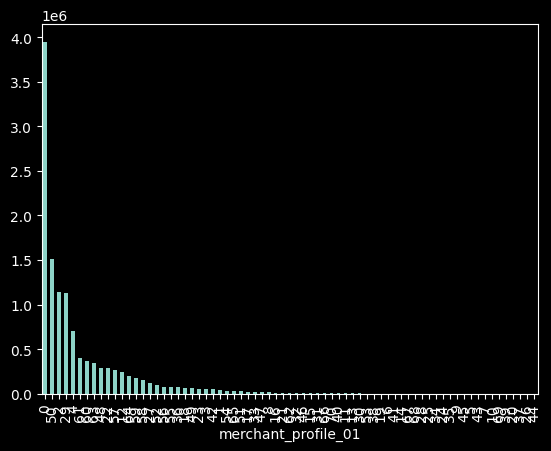

In [33]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
idf['merchant_profile_01'] = labelEncoder.fit_transform(idf['merchant_profile_01'])
idf['merchant_profile_01'].value_counts()

idf['merchant_profile_01'].value_counts().plot(kind='bar')




In [34]:
feat_explain = pd.read_excel('../data/Amex_ori/Amex Campus.xlsx')


FileNotFoundError: [Errno 2] No such file or directory: '../data/Amex_ori/Amex Campus.xlsx'

In [ ]:
feat_explain.head()


,Feature Name,Feature description,Feature Type
0,activation,Activation Indicator (Dependent Variable),numeric
1,customer,Customer ID,numeric
2,customer_digital_activity_01,Customer Emails,numeric
3,customer_digital_activity_02,Customer Logins,numeric
4,customer_digital_activity_03,Customer Offers,numeric
